In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
#Reading CSV
df = pd.read_csv('insurance.csv')

In [3]:
#Setting Rows and Columns to Be Displayed to Rows and Columns of The Dataset
pd.set_option.max_rows =df.shape[0]
pd.set_option.max_columns = df.shape[1]

In [4]:
#Checking For Null Values - 1
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Checking For Types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#Checking for both Null Values and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
#5 Point Summary of Numerical Attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#For 5 Point Summary of Numerical Attributes only IQR is mising in describe() and mode too.
#IQR For Bmi
df.describe()['bmi']['75%'] - df.describe()['bmi']['25%']

8.3975

In [8]:
#IQR for Age
df.describe()['age']['75%'] - df.describe()['age']['25%']

24.0

In [9]:
#IQR for Charges
df.describe()['charges']['75%'] - df.describe()['charges']['25%']

11899.625365

In [10]:
#Calculating Mode
df[['age','bmi','charges','children']].mode()

,age,bmi,charges,children
0,18,32.3,1639.5631,0


In [11]:
#Quick Visualization to Understand Data ##########################################################################

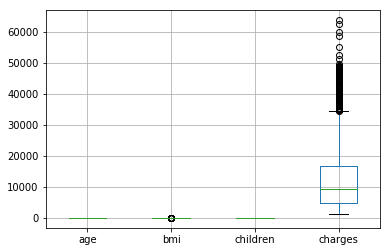

In [12]:
#Looks like Charges column has most Outliers :)
df.boxplot()

In [13]:
#Looks Like Charges Field has Most Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB1429CD30>,
      dtype=object)

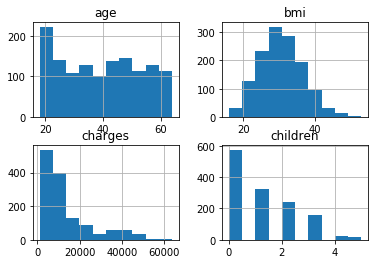

In [14]:
df.hist()

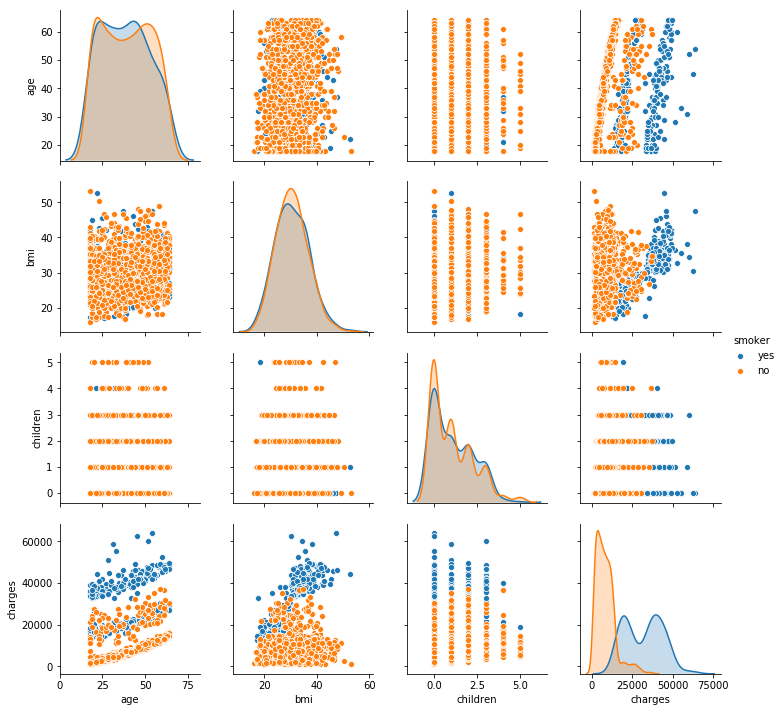

In [15]:
#Its VERY CLEAR  'charge' COLUMN  is in Great CORRELATION  with 'smoker'
sns.pairplot(df, hue='smoker')

In [16]:
#Making All Columns Ready###############################################################################################

In [17]:
#Making 'smoker' Column
df['smoker'] = df['smoker'].apply(lambda x : 1 if(x == 'yes') else 0)

In [18]:
#Making 'sex' Column
df['sex'] = df['sex'].apply(lambda x : 1 if(x == 'male') else 0)

In [19]:
#Making Region Column Ready - Might not be very useful Column - But for the fun of coding :)
#Just Displaying the number with which strings are getting Replaced .
for i in range(len(list(df['region'].drop_duplicates()))):
    print('{0} - {1}'.format(list(df['region'].drop_duplicates())[i],i))
             

southwest - 0
southeast - 1
northwest - 2
northeast - 3


In [20]:
#Making Region Column Ready - This is the shortest code possible I think :)
df['region'] = df['region'].apply(lambda x : (list(df['region'].drop_duplicates()).index(x)) if(x) else x)

In [21]:
df['region']

0       0
1       1
2       1
3       2
4       2
5       1
6       1
7       2
8       3
9       2
10      3
11      1
12      0
13      1
14      1
15      0
16      3
17      3
18      0
19      0
20      3
21      0
22      1
23      3
24      2
25      1
26      3
27      2
28      2
29      0
       ..
1308    0
1309    0
1310    2
1311    2
1312    0
1313    0
1314    2
1315    3
1316    0
1317    1
1318    3
1319    2
1320    2
1321    3
1322    1
1323    1
1324    2
1325    3
1326    3
1327    1
1328    3
1329    0
1330    1
1331    0
1332    0
1333    2
1334    3
1335    1
1336    0
1337    2
Name: region, Length: 1338, dtype: int64

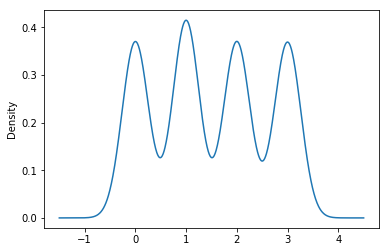

In [22]:
df['region'].plot(kind='kde')

In [23]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [24]:
#Dropping the Region Column and before that copying in to a series Variable for Later Use :)
s = pd.Series()
s = df['region']
del(df['region'])

In [25]:
#Checking Columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB1A5C3518>,
      dtype=object)

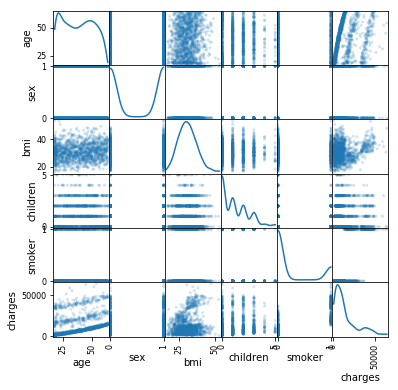

In [26]:
#QUICKY OVERVIEW OF DISTRIBUTIONS OF ALL THE COLUMNS 
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

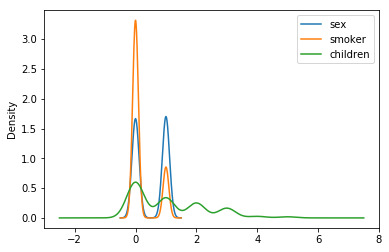

In [27]:
#Distribution for all Categorical columns ------(can be done on single coulmn too seperately)
df[['sex','smoker', 'children']].plot(kind='kde')

In [28]:
#Can also be done using a distplot from seaborn

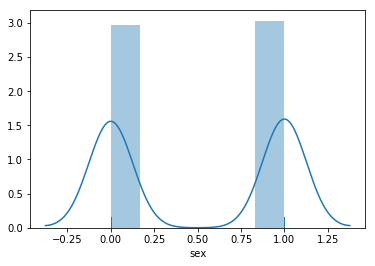

In [29]:
#sns.distplot(df['children'], kde=True, rug=True)
#sns.distplot(df['smoker'], kde=True, rug=True)
sns.distplot(df['sex'], kde=True, rug=True)

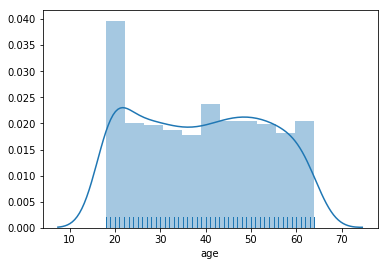

In [30]:
#Distribution of Age
sns.distplot(df['age'], kde=True, rug=True)

In [31]:
#Skewness of Age - Its has a positive Skew
df['age'].skew()

0.05567251565299186

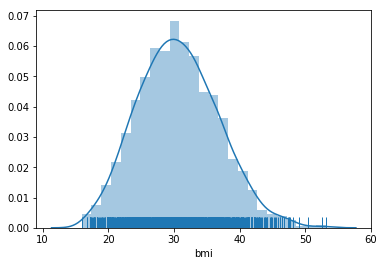

In [32]:
#Distribution of BMI
sns.distplot(df['bmi'], kde=True, rug=True)

In [33]:
#Skewness of 'bmi' - Its Positively Skeyed Distribution
df['bmi'].skew()

0.2840471105987448

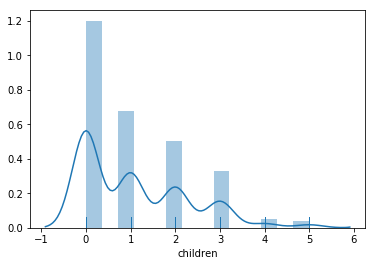

In [34]:
#Distribution of Children
sns.distplot(df['children'], kde=True, rug=True)

In [35]:
#skewness of children - Its positively skewed
df['children'].skew()

0.9383804401702414

In [36]:
###########################################################################################################################
#Do charges of people who smoke differ significantly from the people who don't?
###########################################################################################################################

In [37]:
#LETS NULL-HYPOTHESIS TO Find Out How Correlated thse Columns Charges and Smokers are based on P-Value
#H0 - Charges of People who Smoke =  Charges of people who do not smoke
#H1 - Charges of people who Smoke  -not-equal-to  Charges of People who do not smoke

In [38]:
#stats.ttest_ind(df.groupby('smoker')['charges'].get_group(1),df.groupby('smoker')['charges'].get_group(0))

stats.ttest_ind(df.loc[df['smoker'] == 1, 'charges'],df.loc[df['smoker'] == 0, 'charges'])

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [39]:
#As P-value is extremly small we can reject the Null Hypothesis (i.e reject H0)

In [40]:
#The above results shows that there is a Very High Correleation between 'smoker' and 'charge' as the P-Value is 
#extremely small---------------Lets See the Correlatoin Visually using a pairplot

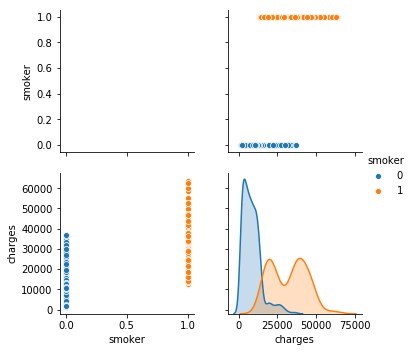

In [42]:
sns.pairplot(data=df[['smoker','charges']], hue='smoker')

In [43]:
#Again it Confirms High Correlation between 'smoker' and 'charges' columns as there is a clear seperation

In [44]:
#Simple Correlation check by GroupBy
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [45]:
#Here its clear a Smoker mean charge is much higher than for non-smokers

In [46]:
##########################################################################################################################
#Does bmi of males differ significantly from that of females?
##########################################################################################################################

In [47]:
#USING INFERENTIAL Statistics - Null Hypothesis

In [48]:
stats.ttest_ind(df.loc[df['sex'] == 1, 'bmi'], df.loc[df['sex'] == 0, 'bmi'])

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

In [49]:
#The P-Value is is greater than 0.05 so the Null Hypothesis(i.e both bmi's are equal) can not be rejected.

In [50]:
#Lets See Visually How Correlated are Sex and BMI columns 

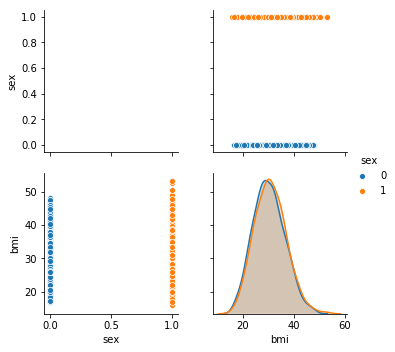

In [51]:
sns.pairplot(data=df[['sex','bmi']], hue='sex')

In [52]:
#There is no Seperation and the this Show that they are not Correlated to each other.

In [53]:
#Lets use Simple Describe to see if it confirms the pairplot and Null-Hypothesis

In [54]:
df.groupby('sex')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
1,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [55]:
#The Mean Values for BMI for both male and female are almost close and so is the std ....So it again confirms 
#that bmi and sex are not correlated to each other as both male and females average bmi is really close.

In [56]:
#bmi of males does not differ significantly from that of females****************************************************

In [57]:
#########################################################################################################################
#Is the proportion of smokers significantly different in different genders?
#########################################################################################################################

In [58]:
#Comapiring Sex and Smoker Using a Cross Tab 
pd.crosstab(df['sex'],df['smoker'])

smoker,0,1
sex,,
0,547,115
1,517,159


In [59]:
#Percentage of Males who Smoke  - (males who smoke)/(total number of males)(159/676)
(df.loc[(df['sex'] == 1) & (df['smoker'] == 1),].shape[0]) / (df.loc[df['sex'] == 1,].shape[0])

0.23520710059171598

In [60]:
#Percentage of Females who Smoke  - (females who smoke)/(total number of females)(115/662)
(df.loc[(df['sex'] == 0) & (df['smoker'] == 1),].shape[0]) / (df.loc[df['sex'] == 0,].shape[0])

0.17371601208459214

In [61]:
#So 23% of Males Smoke and 17% of Females Smoke :)---------------------This too Shows a slight Correlation...

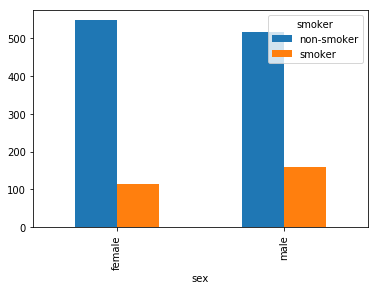

In [62]:
pd.crosstab(df['sex'].apply(lambda x:'male' if(x==1) else 'female') , df['smoker'].apply(lambda x:'smoker' if(x==1) else 'non-smoker')).plot.bar()

In [63]:
#Since Both Are Categorical Variable - CHI-SQURE Test would be Approprite - we can pass the crosstab to CHI-SQUARE
#H0 - Proportion of Smokers in Male = Proportion of Smokers in Female
#Ha - Proportion of Smokers in Male -notequa-  Proportion of Smokers in Female

In [64]:
stats.chi2_contingency(pd.crosstab(df['sex'],df['smoker']))

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [65]:
#Chi2 value = 7.3, p = 0.0065, degreeofFreedom = 1
#The Chi2 > 1 (degrees of freeome)(but Not very large) and p < 0.05 (but not extremely small)
#So Rejecting Null Hypothesis ...
#So There is a Moderate Correlation between 'Sex' and 'Smoker'


In [66]:
# So proportion of smokers moderately different in different genders

In [67]:
#Verifying The Same with Proportions_Ztest*****************************************************************************

In [68]:
pd.crosstab(df['sex'], df['smoker'])

smoker,0,1
sex,,
0,547,115
1,517,159


In [69]:
count = [115, 159]
nobs = [(547+115),(517+159)]

In [70]:
sm.stats.proportions_ztest(count, nobs)

(-2.7867402154855503, 0.005324114164320532)

In [71]:
#The p-value is < 0.05 so again we can reject the Null Hypothesis and go with Alternate ...
#Alternate says that proportion of smokers differe in different genders
#So we can Conclude that ----- Proportion of Smokers Differ in Different Genders

In [72]:
#########################################################################################################################
#Is the distribution of bmi across women with no children, one child and two children, the same ?
#########################################################################################################################

In [73]:
#HERE Categorical Variables are women_child0, women_child1, women_child2 and Numerical variable is BMI
#and we Are trying to find a Relationship between Categorical variables and Numericla Variable

women_child0 =  df.loc[(df['sex'] == 0) &(df['children'] == 0),'bmi'] 
women_child1 =  df.loc[(df['sex'] == 0) &(df['children'] == 1),'bmi']
women_child2 =  df.loc[(df['sex'] == 0) &(df['children'] == 2),'bmi']

In [74]:
#Using ANOVA 
stats.f_oneway(women_child0,women_child1,women_child2)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [75]:
#Pvalue is large and we can straight forward say that the there is no relation between womenwithchildren(0,1,2) 
#and their bmi.........so cant Reject the Null-Hypothesis

In [76]:
#Null Hypothesis is distribution of bmi across women_child0, women_child1,women_chil2 is same .......
#Alternate Hypothesis is that they are not Same...since p > 0.05 we are rejecting the Alternate ....

In [77]:
#Since No Correlation their Distrution Should Overlap .....Lets see a PairPlot to Confirm the same 

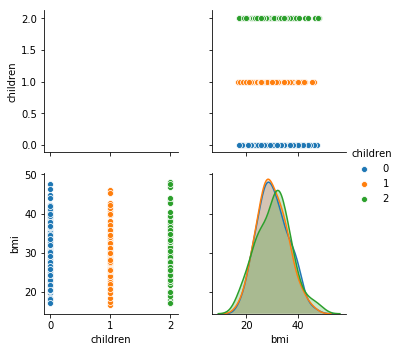

In [78]:
 sns.pairplot(df.loc[((df['sex'] == 0) & (df['children'] < 3)),['children','bmi']],diag_kind='kde', hue='children')

In [79]:
#Looks Like the Distribution of BMI across womenwithchild(0,1,2) Overlap and so we say VERY SIMILAR Distributions..........
#i.e No Correlation

In [80]:
#From the Below Groupby too we can see the mean and std of womenchild(0,1,2) are almost close :)

In [81]:
df.loc[(df['sex'] == 0) & (df['children'] < 3),].groupby('children')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,289.0,30.361522,5.966934,17.290,26.2000,29.9250,34.6000,47.41
1,158.0,30.052658,5.786831,16.815,25.9825,29.5675,33.9425,46.09
2,119.0,30.649790,6.628200,17.195,25.7700,31.3000,34.7500,48.07


In [82]:
 # So the distribution of bmi across women with no children, one child and two children is  the same

In [83]:
#########################################################################################################################
#########################################################################################################################

In [84]:
# HERE ENDS THE ANSWER TO ALL THE QUESTIONS POSTED IN THE PDF GIVEN IN THE PROJECT

In [85]:
#########################################################################################################################
#########################################################################################################################

In [86]:
################################################  FURTHER ANALYSYS ######################################################

In [87]:
#CREATING A NEW FEATURE COLUM - NAMED HEALTH

In [88]:
#There is No Good Correlation between bmi and charge
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [89]:
#So is it possible to Create an other column out of 'bmi' which will be in high Correlation with 'charges'? :) ..Lets See
#From Problem Statement pdf we have bmi in the range of 18.5 to 24.9 as Healthy and above it is either obese or unhelathy..


In [90]:
def bmi_to_health(bmi):
    if(bmi < 18.5):
        return 'healthy'
    if((bmi >= 18.5) & (bmi <= 24.9)):
        return 'healthy'
    if((bmi >= 25) & (bmi <= 29.9)):
        return 'overweight'
    if((bmi >= 30) & (bmi <= 53.13)):
        return 'obese'

In [91]:
df['health'] = df['bmi'].apply(bmi_to_health)


In [92]:
df['health']

0       overweight
1            obese
2            obese
3          healthy
4       overweight
5       overweight
6            obese
7       overweight
8       overweight
9       overweight
10      overweight
11      overweight
12           obese
13           obese
14           obese
15         healthy
16           obese
17         healthy
18           obese
19           obese
20           obese
21           obese
22           obese
23           obese
24      overweight
25      overweight
26         healthy
27           obese
28         healthy
29           obese
           ...    
1308         obese
1309         obese
1310    overweight
1311    overweight
1312         obese
1313         obese
1314       healthy
1315    overweight
1316       healthy
1317         obese
1318         obese
1319    overweight
1320         obese
1321    overweight
1322         obese
1323         obese
1324    overweight
1325         obese
1326         obese
1327         obese
1328       healthy
1329        

In [93]:
#NOW Lets See How Correlated the new Column "health" is with "Charges" Using Hypothesis testing 
stats.f_oneway(df.loc[df['health'] == 'healthy', 'charges'],df.loc[df['health'] == 'overweight', 'charges'],df.loc[df['health'] == 'obese', 'charges'])

F_onewayResult(statistic=27.69150802374464, pvalue=1.6543954086263793e-12)

In [94]:
#pvalue is very small so there is a decent correlation between "Health" and "Charges" Column -- Lets see a pairplot
#Since there is a visible seperation ..we can say "health" and "charges" they are correlated

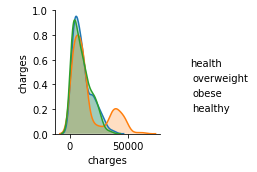

In [95]:
sns.pairplot(df[['health','charges']], hue='health')

In [96]:
#Which Clients should the Insurance Company give Insurance to and whom should they reject So that they run into profits :) :)

In [97]:
#My Plan is to use 'Health' and 'Smoker' Column to Create a Final output column 'Insurance',predicting 
#the clients who should be given insurance and who should be rejected to make best profits for the Insurance Company.

In [98]:
#Smoker -1     Non-Smoker - 0
pd.pivot_table(df, index=['health','smoker'])

age        bmi       charges  children       sex
health     smoker                                                        
healthy    0       36.112299  22.137807   7433.864413  1.074866  0.486631
           1       37.309091  22.277182  19839.278309  1.236364  0.418182
obese      0       40.658363  35.203959   8842.691548  1.108541  0.498221
           1       39.124138  35.506517  41557.989840  1.096552  0.641379
overweight 0       39.137705  27.556475   8306.378031  1.068852  0.472131
           1       37.888889  27.508056  22379.034063  1.027778  0.583333

In [99]:
#from Pivot table its cleanr (healthy,non-smoker) spends less towards medicines so priority1 and so on ...........
#(healthy, non-smoker) - priority1
#(overweight, non-smoker) - priority2
#(obese , non-smoker) - priority3
#(healthy, smoker) - priority4
#(overweight, smoker) - reject2(2nd high priority reject)
#(obese, smoker) - reject1 (1st high priority reject)

def insurance(cols):
    health, smoker = cols
    if((health == 'healthy') & (smoker == 0)):
        return 'priority1'
    if((health == 'overweight') & (smoker == 0)):
        return 'priority2'
    if((health == 'obese') & (smoker == 0)):
        return 'priority3'
    if((health == 'healthy') & (smoker == 1)):
        return 'priority4'
    if((health == 'overweight') & (smoker == 1)):
        return 'reject2'
    if((health == 'obese') & (smoker == 1)):
        return 'reject1'

In [100]:
#Creating a New Colum 'Insurance' out of 'Health' and "Smoker" Columns
df['Insurance'] = df[['health','smoker']].apply(insurance, axis=1)

In [101]:
#Almost all the Rejects what we derived from (health, smoker) columns has high expenditure ...So Predictions is working :)
df.head(30)

,age,sex,bmi,children,smoker,charges,health,Insurance
0,19,0,27.900,0,1,16884.92400,overweight,reject2
1,18,1,33.770,1,0,1725.55230,obese,priority3
2,28,1,33.000,3,0,4449.46200,obese,priority3
3,33,1,22.705,0,0,21984.47061,healthy,priority1
4,32,1,28.880,0,0,3866.85520,overweight,priority2
5,31,0,25.740,0,0,3756.62160,overweight,priority2
6,46,0,33.440,1,0,8240.58960,obese,priority3
7,37,0,27.740,3,0,7281.50560,overweight,priority2
8,37,1,29.830,2,0,6406.41070,overweight,priority2
9,60,0,25.840,0,0,28923.13692,overweight,priority2


In [102]:
#Pivort table shows that the Prediction given by 'Insurance' Column works most of the times :) 
pd.pivot_table(df, index=['Insurance','children'], aggfunc = {'age':np.mean, 'charges':np.mean})

age       charges
Insurance children                         
priority1 0         36.204819   6801.883913
          1         36.500000   8113.764052
          2         34.676471   7965.946691
          3         36.800000   7408.797295
          4         51.000000  11520.099850
          5         35.200000   7606.485790
priority2 0         38.568182   7468.692929
          1         39.000000   7969.857973
          2         39.333333   9552.402664
          3         42.758621  10180.946206
          4         38.000000  10771.924542
          5         36.000000   9056.991550
priority3 0         39.870833   7971.681121
          1         40.684211   8634.383890
          2         41.284314   9938.117662
          3         42.884058  10015.795685
          4         41.272727  13402.748337
          5         35.142857   7972.569679
priority4 0         35.869565  19667.341679
          1         42.000000  19977.375606
          2         36.357143  19570.599296
          3         38.111111  20664.532594
          5         39.000000  19023.260000
reject1   0         36.803279  40272.106227
          1         41.633333  42731.659531
          2         39.882353  42020.367136
          3         41.368421  43078.185914
          4         37.000000  40182.246000
reject2   0         37.451613  22429.339232
          1         36.545455  21679.594540
          2         44.142857  22678.870536
          3         40.100000  24086.317794
          4         26.500000  19707.292400

In [103]:
#Cant Remove the Children Column as it shows a slight correlation to charges when kids are (0,1,2)......................

In [104]:
stats.f_oneway(df.loc[df['children'] == 0, 'charges'],df.loc[df['children'] == 1, 'charges'],df.loc[df['children'] == 2, 'charges'])

F_onewayResult(statistic=4.345477145846477, pvalue=0.013181717660802504)

In [107]:
#pvalue < 0.05  (i.e 0.013 < 0.05)-Slight Relation.

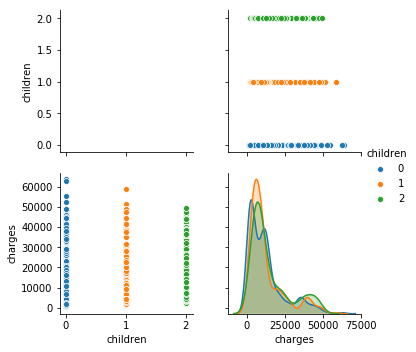

In [108]:
sns.pairplot(df.loc[df['children'] < 3,['children','charges']],diag_kind='kde', hue='children')

In [109]:
#####--HOW TO MAKE USE OF REGION COLUMN ###########################################################################

In [110]:
df['region'] = s

In [111]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'health',
       'Insurance', 'region'],
      dtype='object')

In [112]:
df.groupby('region')['charges'].describe().sort_values(by = 'mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
3,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
2,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
0,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [113]:
#southwest - 0
#southeast - 1
#northwest - 2
#northeast - 3

In [114]:
pd.crosstab(df['region'],df['health'])

health,healthy,obese,overweight
region,,,
0,51,173,101
1,40,243,74
2,69,148,105
3,82,143,97


In [115]:
#Region 1 has Highest Number of Obese people and Lowest Number of Healthy People and 
#the 'charge' spend on medicine too is more in Region 1 compared to other 3 regions
#so its double confirmation :)

In [116]:
#Region 1 - Unhealthy Region (highest number of obese and lowest number of healthy)
#Region 3 - Most Healthy Region(highest number of healthy and lowest number of obese)
#Region 0,2 - Healthy Region

In [117]:
def region_func(x):
    if(x == 1):
        return 'Unhealthy-Region'
    if(x == 3):
        return 'MostHealthy-Region'
    else:
        return 'Healthy-Region'

In [118]:
df['region'] = df['region'].apply(region_func)

In [119]:
#Below Popping is to Just to push the Priority Column to End

In [120]:
insurance_col = df.pop('Insurance')

In [121]:
df['insurance'] = insurance_col

In [122]:
df.head(20)

,age,sex,bmi,children,smoker,charges,health,region,insurance
0,19,0,27.900,0,1,16884.92400,overweight,Healthy-Region,reject2
1,18,1,33.770,1,0,1725.55230,obese,Unhealthy-Region,priority3
2,28,1,33.000,3,0,4449.46200,obese,Unhealthy-Region,priority3
3,33,1,22.705,0,0,21984.47061,healthy,Healthy-Region,priority1
4,32,1,28.880,0,0,3866.85520,overweight,Healthy-Region,priority2
5,31,0,25.740,0,0,3756.62160,overweight,Unhealthy-Region,priority2
6,46,0,33.440,1,0,8240.58960,obese,Unhealthy-Region,priority3
7,37,0,27.740,3,0,7281.50560,overweight,Healthy-Region,priority2
8,37,1,29.830,2,0,6406.41070,overweight,MostHealthy-Region,priority2
9,60,0,25.840,0,0,28923.13692,overweight,Healthy-Region,priority2


In [123]:
#Insurance is not Accepted or Rejected Using Region ...An Obese person who smokes from HealthyRegion can also be Rejected
#Or a Helathy person from Unhealthy Region can be in Priroty 2 etc

In [124]:
#But if we Observe most of the Prioriy1 and prority2 fall Under MostHealthy or Healthy Regions.....

In [125]:
# FROM REGION COLUMN WE CAN SAY THAT ----- MORE HOSPITALS, GYMS , MEDICAL SHOPS CAN COME IN 'Unhealthy-Region'.....
# TO GET PROFITS INSURANCE COMPANY SHOULD OPEN THEIR BRANCH IN Healthy Regions as the healthy person takes Insurance he 
#spends less money on medicine

In [126]:
pd.crosstab(df['region'],df['smoker'])

smoker,0,1
region,,
Healthy-Region,534,116
MostHealthy-Region,257,67
Unhealthy-Region,273,91


In [127]:
#LOT OF INFORMATION CAN BE DERIVER FROM REGION COLUMN----MIGHT NOT BE RELATED TO INSURANCE BUT IN GENERAL

In [128]:
# northeast is the most healthy region 
# southeast in unhealthy region 
# But we have more cigarete shops in (southwest & northwest) - (as smokers are more in this area)